In [2]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Ana Paulina Olivares Álvarez

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [4]:
def derivada(f, x, h, tol = 1e-8):

  '''
  Calcula la derivada de la función usando diferencias finitas centrales
  Entrada:
  - f: función a evaluar
  - x: array de puntos donde evalua la derivada
  - h: paso
  Retorna:
  - fprime: array de las derivadas usando diferencias finitas centrales (función)
  '''

  fprime = (f(x + h) - f(x - h)) / (2*h)

  return fprime

In [18]:
f = lambda x: 3 ** x
x0 = 2
h = 0.1
tol = 1e-8

# Derivada exacta
df_ex = lambda x: 3 ** x * np.log(3)

lista_h = []
lista_error = []

while True: # encontrar la derivada hasta que la diferencia < tol
    df_aprox = derivada(f, x0, h) # calcular la derivada aproximada
    df_exacta = df_ex(x0) # calcular la derivada exacta
    error = abs(df_aprox - df_exacta)

    lista_h.append(h)
    lista_error.append(error)

    if error < tol:
        break

    h /= 2

derivada =

print(f'La derivada exacta en x = 2 es: {df_exacta}')
print(f'La derivada aproximada es: {df_aprox}')
print(f'El error es: {error}')

La derivada exacta en x = 2 es: 9.887510598012987
La derivada aproximada es: 9.88751060276627
El error es: 4.753282212277554e-09


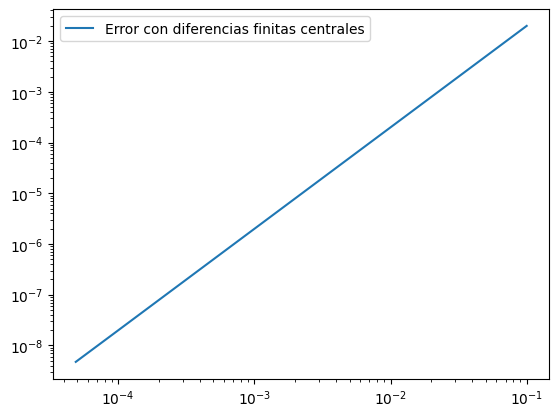

In [14]:
# gráfico logaritmico del error absoluto

plt.plot(lista_h, lista_error, label = 'Error con diferencias finitas centrales')
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [16]:
r = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
v = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00])

In [15]:
lagrange?

In [19]:
CubicSpline?

In [32]:
r_interp = np.linspace(0, 1, 100)

# Polinomio de Lagrange
P_lagrange = lagrange(r, v)
v_lagrange = P_lagrange(r_interp)

# Polinomio CubicSpline
P_cs = CubicSpline(r, v)
v_cs = P_cs(r_interp)

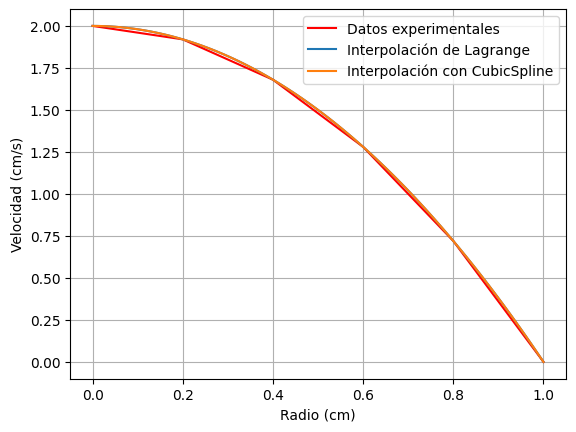

In [34]:
# Gráfica
plt.plot(r, v, color='red', label='Datos experimentales')
plt.plot(r_interp, v_lagrange, label='Interpolación de Lagrange')
plt.plot(r_interp, v_lagrange, label='Interpolación con CubicSpline')
plt.xlabel('Radio (cm)')
plt.ylabel('Velocidad (cm/s)')
plt.legend()
plt.grid()
plt.show()

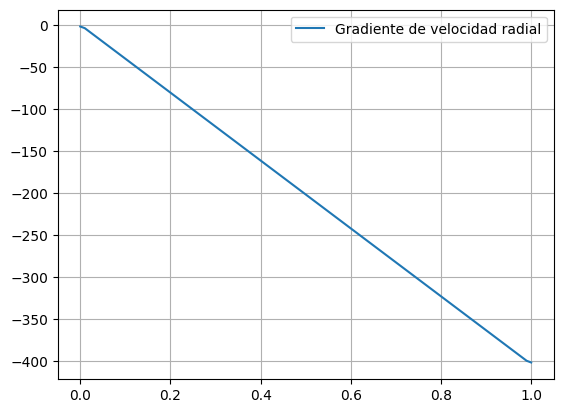

In [39]:
h = 1e-4

dy = np.gradient(v_cs, h) # derivada de la interpolación con CubicSpline

plt.plot(r_interp, dy, label = 'Gradiente de velocidad radial')
plt.legend()
plt.grid()
plt.show()

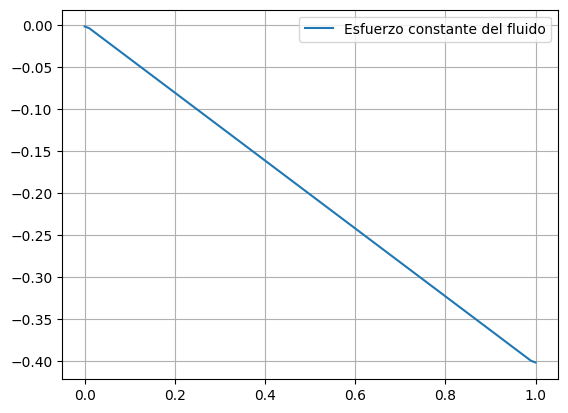

In [46]:
mu = 0.001

t_r = mu * dy

plt.plot(r_interp, t_r, label = 'Esfuerzo constante del fluido')
plt.legend()
plt.grid()
plt.show()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [51]:
def integral_z(y, x):
  integrando = lambda z: x * y * z
  res, _ = quad(integrando, 0, 1-x-y)
  return res

def integral_y(x):
  integrando = lambda y: integral_z(y, x)
  res, _ = quad(integrando, 0, 1-x)
  return res

integral, error = quad(integral_y, 0, 1)
print(f'El resultado de la integral es {integral}')

El resultado de la integral es 0.001388888888888889


In [54]:
f = lambda z, y, x: x * y * z

a, b = 0, 1
g, h = lambda x: 0, lambda x: 1-x
r, q = lambda x, y: 0, lambda x, y: 1-x-y

tplquad(f, a, b, g, h, r, q)

(0.001388888888888889, 8.555839940243213e-17)